## MNIST Data Set Classification 

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [ ]:
Batch_Size = {} 

In [ ]:
(X_train, Y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_test, X_validate, Y_test, Y_validate = train_test_split(x_test, y_test, train_size=0.4, random_state=42)

**The Test  Data set is Further broken into further two Sets namely Test and Validatation Data Set . The Validation Data would be used to check for Early stopping while Test Dataset is for final perfomance Testing**


In [ ]:
X_test.shape

(4000, 28, 28)

In [ ]:
X_validate.shape

(6000, 28, 28)

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

## No of nodes for Same Parameters when the When the Hidden Layers is changed from 1 to 2

1. *Let the no of Nodes in each layer be x when no of layers is 1*
>  Total No of Parameters when layer is 1 = \begin{equation*}
795x+10
\end{equation*}
2. *Let the no of Nodes in each layer be y when no of layers are 2*
>  Total No of Parameters = \begin{equation*}
y^2+796y+10
\end{equation*}

3. Total No of parameters should be same Thus -
> \begin{equation*}
y^2+796y+10=795x+10
\end{equation*}
\begin{equation*}
795x=796y+y^2
\end{equation*}
\begin{equation*}
x=(796y+y^2)/795  
\end{equation*}
where x and y are integers

4. Satisfying the Above equation to find no of nodes we get 
> \begin{equation*}
x=352(Layers=1)
\end{equation*}
\begin{equation*}
y=264(Layers=2)
\end{equation*}

## Part 1: No of  Layers equals 1

> **A ) Relu and Sigmoid**







In [ ]:
Model=Sequential()
Model.add(Flatten(input_shape=(28,28,1)))  #Flatten a matrix into straight array so that can be fed into DNN
Model.add(Dense(352,activation="relu")) #1st Layer No of nodes =352
Model.add(Dense(10,activation="softmax"))

In [ ]:
Model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),  
    metrics=['accuracy'],
)

#### Early Stopping allow us to Stop training early depending upon the perfomance on the Validation Data

* Monitor = At every epoch it would check the perfomance on validation data 
* Patience = It would ignore the 5 times the increase in validation loss or negligible decrease in perfomenace
* Min_Delta = Minimum loss should decrease by 0.1 to consider improvement.... Penalizes only Negligibile improvement 

In [ ]:
EarlyStop=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss' , verbose=2, patience=5,restore_best_weights=False,min_delta=0.01
)

In [ ]:
Model_History = Model.fit(X_train,Y_train,batch_size=1024, epochs=25,shuffle=True,verbose=1,callbacks=[EarlyStop],validation_data=(X_validate,Y_validate))

Epoch 1/25
59/59 [==============================] - 2s 31ms/step - loss: 15.5985 - accuracy: 0.8202 - val_loss: 3.2991 - val_accuracy: 0.9202
Epoch 2/25
59/59 [==============================] - 2s 29ms/step - loss: 2.2802 - accuracy: 0.9293 - val_loss: 2.0133 - val_accuracy: 0.9328
Epoch 3/25
59/59 [==============================] - 2s 29ms/step - loss: 1.2154 - accuracy: 0.9484 - val_loss: 1.5822 - val_accuracy: 0.9417
Epoch 4/25
59/59 [==============================] - 2s 29ms/step - loss: 0.7714 - accuracy: 0.9596 - val_loss: 1.4616 - val_accuracy: 0.9403
Epoch 5/25
59/59 [==============================] - 2s 29ms/step - loss: 0.4890 - accuracy: 0.9694 - val_loss: 1.3713 - val_accuracy: 0.9433
Epoch 6/25
59/59 [==============================] - 2s 29ms/step - loss: 0.3335 - accuracy: 0.9749 - val_loss: 1.2271 - val_accuracy: 0.9497
Epoch 7/25
59/59 [==============================] - 2s 29ms/step - loss: 0.2260 - accuracy: 0.9805 - val_loss: 1.2262 - val_accuracy: 0.9522
Epoch 8/25
5

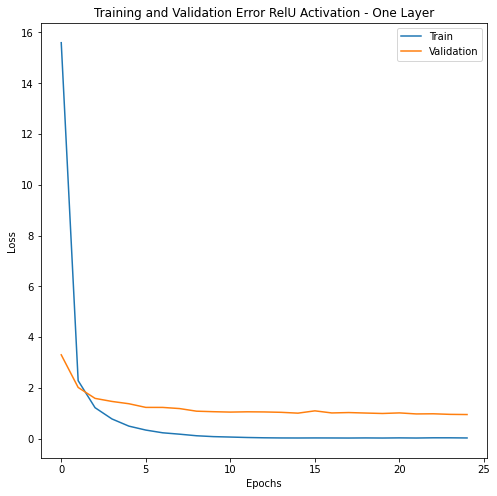

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))
plt.plot(Model_History.history['loss'])
plt.plot(Model_History.history['val_loss'])
plt.legend(['Train', 'Validation'], loc='upper right')
plt.xlabel("Epochs")
plt.ylabel("Loss")
x=plt.title("Training and Validation Error RelU Activation - One Layer")

In [ ]:
Temp=Model.evaluate(X_test,Y_test,return_dict=True)
Batch_Size['One Layer Relu']=Temp['accuracy']

125/125 [==============================] - 0s 2ms/step - loss: 0.8786 - accuracy: 0.9643


----------------------------------------------------------------------------

In [ ]:
Model=Sequential()
Model.add(Flatten(input_shape=(28,28,1)))  #Flatten a matrix into straight array so that can be fed into DNN
Model.add(Dense(352,activation="sigmoid")) #1st Layer No of nodes =352
Model.add(Dense(10,activation="softmax"))

In [ ]:
Model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),  
    metrics=['accuracy'],
)

In [ ]:
EarlyStop=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss' , verbose=2, patience=5,restore_best_weights=False,min_delta=0.01
    
)

In [ ]:
Model_History = Model.fit(X_train,Y_train,batch_size=1024, epochs=25,shuffle=True,verbose=1,callbacks=[EarlyStop],validation_data=(X_validate,Y_validate))

Epoch 1/25
59/59 [==============================] - 2s 31ms/step - loss: 0.6953 - accuracy: 0.8070 - val_loss: 0.3512 - val_accuracy: 0.9057
Epoch 2/25
59/59 [==============================] - 2s 29ms/step - loss: 0.3116 - accuracy: 0.9157 - val_loss: 0.2732 - val_accuracy: 0.9257
Epoch 3/25
59/59 [==============================] - 2s 29ms/step - loss: 0.2536 - accuracy: 0.9312 - val_loss: 0.2358 - val_accuracy: 0.9360
Epoch 4/25
59/59 [==============================] - 2s 29ms/step - loss: 0.2208 - accuracy: 0.9383 - val_loss: 0.2158 - val_accuracy: 0.9398
Epoch 5/25
59/59 [==============================] - 2s 29ms/step - loss: 0.1992 - accuracy: 0.9450 - val_loss: 0.2022 - val_accuracy: 0.9425
Epoch 6/25
59/59 [==============================] - 2s 29ms/step - loss: 0.1796 - accuracy: 0.9503 - val_loss: 0.1833 - val_accuracy: 0.9477
Epoch 7/25
59/59 [==============================] - 2s 29ms/step - loss: 0.1658 - accuracy: 0.9535 - val_loss: 0.1719 - val_accuracy: 0.9523
Epoch 8/25
59

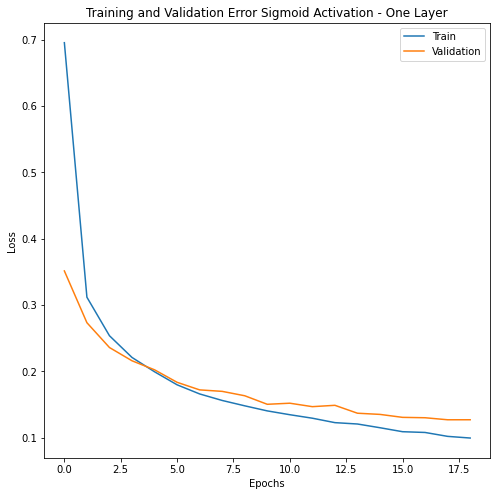

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))
plt.plot(Model_History.history['loss'])
plt.plot(Model_History.history['val_loss'])
plt.legend(['Train', 'Validation'], loc='upper right')
plt.xlabel("Epochs")
plt.ylabel("Loss")
x=plt.title("Training and Validation Error Sigmoid Activation - One Layer")

In [ ]:
Temp=Model.evaluate(X_test,Y_test,return_dict=True)
Batch_Size['One Layer Sigmoid']=Temp['accuracy']

125/125 [==============================] - 0s 2ms/step - loss: 0.1148 - accuracy: 0.9668


> **B ) Linear Activation (Non Linearity)**

In [ ]:
Model=Sequential()
Model.add(Flatten(input_shape=(28,28,1)))  #Flatten a matrix into straight array so that can be fed into DNN
Model.add(Dense(352,activation="linear")) #1st Layer No of nodes =352
Model.add(Dense(10,activation="softmax"))

In [ ]:
Model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),  
    metrics=['accuracy'],
)

In [ ]:
EarlyStop=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss' , verbose=2, patience=5,restore_best_weights=False,min_delta=0.01
    
)

In [ ]:
Model_History = Model.fit(X_train,Y_train,batch_size=1024, epochs=25,shuffle=True,verbose=1,callbacks=[EarlyStop],validation_data=(X_validate,Y_validate))

Epoch 1/25
59/59 [==============================] - 2s 38ms/step - loss: 30.6873 - accuracy: 0.8061 - val_loss: 10.2301 - val_accuracy: 0.8960
Epoch 2/25
59/59 [==============================] - 2s 28ms/step - loss: 8.1318 - accuracy: 0.8954 - val_loss: 6.7180 - val_accuracy: 0.8922
Epoch 3/25
59/59 [==============================] - 2s 28ms/step - loss: 5.6073 - accuracy: 0.8928 - val_loss: 5.2511 - val_accuracy: 0.8987
Epoch 4/25
59/59 [==============================] - 2s 28ms/step - loss: 5.1612 - accuracy: 0.8870 - val_loss: 5.5761 - val_accuracy: 0.8815
Epoch 5/25
59/59 [==============================] - 2s 28ms/step - loss: 4.9855 - accuracy: 0.8872 - val_loss: 5.1584 - val_accuracy: 0.8882
Epoch 6/25
59/59 [==============================] - 2s 28ms/step - loss: 4.5159 - accuracy: 0.8891 - val_loss: 6.3199 - val_accuracy: 0.8575
Epoch 7/25
59/59 [==============================] - 2s 28ms/step - loss: 4.4918 - accuracy: 0.8882 - val_loss: 4.9414 - val_accuracy: 0.8878
Epoch 8/25


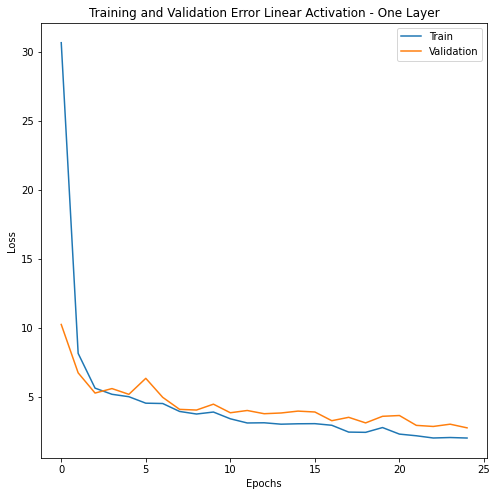

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))
plt.plot(Model_History.history['loss'])
plt.plot(Model_History.history['val_loss'])
plt.legend(['Train', 'Validation'], loc='upper right')
plt.xlabel("Epochs")
plt.ylabel("Loss")
x=plt.title("Training and Validation Error Linear Activation - One Layer")

In [ ]:
Temp=Model.evaluate(X_test,Y_test,return_dict=True)
Batch_Size['One Layer Non Linearity']=Temp['accuracy']

125/125 [==============================] - 0s 2ms/step - loss: 2.5961 - accuracy: 0.8890


## Part 2: No of  Layers equals 2

> **A ) Relu and Sigmoid**







In [ ]:
Model=Sequential()
Model.add(Flatten(input_shape=(28,28,1)))  #Flatten a matrix into straight array so that can be fed into DNN
Model.add(Dense(264,activation="relu")) # 2  Layer No of nodes in each =264
Model.add(Dense(264,activation="relu"))
Model.add(Dense(10,activation="softmax"))

In [ ]:
Model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),  
    metrics=['accuracy'],
)

In [ ]:
EarlyStop=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss' , verbose=2, patience=5,restore_best_weights=False,min_delta=0.01
    
)

In [ ]:
Model_History = Model.fit(X_train,Y_train,batch_size=1024, epochs=25,shuffle=True,verbose=1,callbacks=[EarlyStop],validation_data=(X_validate,Y_validate))

Epoch 1/25
59/59 [==============================] - 2s 34ms/step - loss: 11.7981 - accuracy: 0.7837 - val_loss: 1.6263 - val_accuracy: 0.8980
Epoch 2/25
59/59 [==============================] - 2s 32ms/step - loss: 1.1203 - accuracy: 0.9175 - val_loss: 1.0398 - val_accuracy: 0.9223
Epoch 3/25
59/59 [==============================] - 2s 32ms/step - loss: 0.6425 - accuracy: 0.9394 - val_loss: 0.8519 - val_accuracy: 0.9270
Epoch 4/25
59/59 [==============================] - 2s 32ms/step - loss: 0.4111 - accuracy: 0.9527 - val_loss: 0.7285 - val_accuracy: 0.9347
Epoch 5/25
59/59 [==============================] - 2s 32ms/step - loss: 0.2641 - accuracy: 0.9638 - val_loss: 0.6749 - val_accuracy: 0.9395
Epoch 6/25
59/59 [==============================] - 2s 32ms/step - loss: 0.1858 - accuracy: 0.9715 - val_loss: 0.6507 - val_accuracy: 0.9443
Epoch 7/25
59/59 [==============================] - 2s 32ms/step - loss: 0.1289 - accuracy: 0.9776 - val_loss: 0.6350 - val_accuracy: 0.9408
Epoch 8/25
5

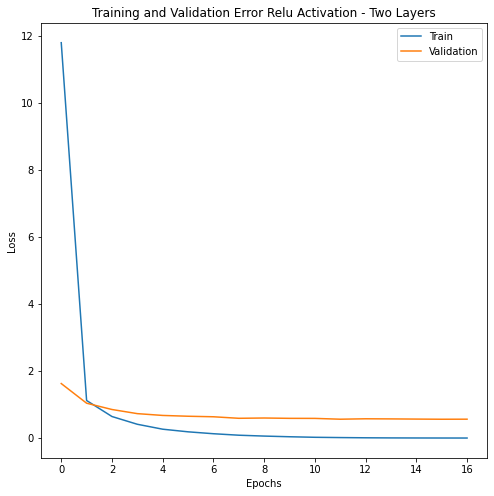

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))
plt.plot(Model_History.history['loss'])
plt.plot(Model_History.history['val_loss'])
plt.legend(['Train', 'Validation'], loc='upper right')
plt.xlabel("Epochs")
plt.ylabel("Loss")
x=plt.title("Training and Validation Error Relu Activation - Two Layers")

In [ ]:
Temp=Model.evaluate(X_test,Y_test,return_dict=True)
Batch_Size['Two Layer Relu']=Temp['accuracy']

125/125 [==============================] - 0s 2ms/step - loss: 0.5027 - accuracy: 0.9482


---------------------------------------------

In [ ]:
Model=Sequential()
Model.add(Flatten(input_shape=(28,28,1)))  #Flatten a matrix into straight array so that can be fed into DNN
Model.add(Dense(264,activation="sigmoid")) # 2  Layer No of nodes in each =264
Model.add(Dense(264,activation="sigmoid"))
Model.add(Dense(10,activation="softmax"))

In [ ]:
Model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),  
    metrics=['accuracy'],
)

In [ ]:
EarlyStop=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss' , verbose=2, patience=5,restore_best_weights=False,min_delta=0.01
    
)

In [ ]:
Model_History = Model.fit(X_train,Y_train,batch_size=1024, epochs=25,shuffle=True,verbose=1,callbacks=[EarlyStop],validation_data=(X_validate,Y_validate))

Epoch 1/25
59/59 [==============================] - 2s 34ms/step - loss: 1.0364 - accuracy: 0.7544 - val_loss: 0.4284 - val_accuracy: 0.8962
Epoch 2/25
59/59 [==============================] - 2s 32ms/step - loss: 0.3494 - accuracy: 0.9057 - val_loss: 0.3004 - val_accuracy: 0.9175
Epoch 3/25
59/59 [==============================] - 2s 32ms/step - loss: 0.2683 - accuracy: 0.9250 - val_loss: 0.2479 - val_accuracy: 0.9297
Epoch 4/25
59/59 [==============================] - 2s 32ms/step - loss: 0.2284 - accuracy: 0.9355 - val_loss: 0.2227 - val_accuracy: 0.9338
Epoch 5/25
59/59 [==============================] - 2s 32ms/step - loss: 0.2059 - accuracy: 0.9413 - val_loss: 0.2010 - val_accuracy: 0.9405
Epoch 6/25
59/59 [==============================] - 2s 32ms/step - loss: 0.1848 - accuracy: 0.9466 - val_loss: 0.1882 - val_accuracy: 0.9453
Epoch 7/25
59/59 [==============================] - 2s 32ms/step - loss: 0.1729 - accuracy: 0.9496 - val_loss: 0.1783 - val_accuracy: 0.9480
Epoch 8/25
59

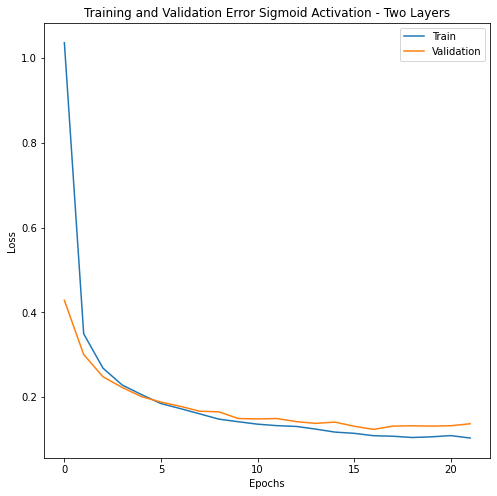

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))
plt.plot(Model_History.history['loss'])
plt.plot(Model_History.history['val_loss'])
plt.legend(['Train', 'Validation'], loc='upper right')
plt.xlabel("Epochs")
plt.ylabel("Loss")
x=plt.title("Training and Validation Error Sigmoid Activation - Two Layers")

In [ ]:
Temp=Model.evaluate(X_test,Y_test,return_dict=True)
Batch_Size['Two Layer Sigmoid']=Temp['accuracy']

125/125 [==============================] - 0s 2ms/step - loss: 0.1252 - accuracy: 0.9595


> **B ) Linear Activation (Non Linearity)**

In [ ]:
Model=Sequential()
Model.add(Flatten(input_shape=(28,28,1)))  #Flatten a matrix into straight array so that can be fed into DNN
Model.add(Dense(264,activation="linear")) # 2  Layer No of nodes in each =264
Model.add(Dense(264,activation="linear"))
Model.add(Dense(10,activation="softmax"))

In [ ]:
Model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),  
    metrics=['accuracy'],
)

In [ ]:
EarlyStop=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss' , verbose=2, patience=5,restore_best_weights=False,min_delta=0.01
    
)

In [ ]:
Model_History = Model.fit(X_train,Y_train,batch_size=1024, epochs=25,shuffle=True,verbose=1,callbacks=[EarlyStop],validation_data=(X_validate,Y_validate))

Epoch 1/25
59/59 [==============================] - 2s 33ms/step - loss: 25.2537 - accuracy: 0.8228 - val_loss: 9.1074 - val_accuracy: 0.8935
Epoch 2/25
59/59 [==============================] - 2s 31ms/step - loss: 6.4558 - accuracy: 0.8935 - val_loss: 5.0938 - val_accuracy: 0.8840
Epoch 3/25
59/59 [==============================] - 2s 31ms/step - loss: 3.8148 - accuracy: 0.8918 - val_loss: 3.8362 - val_accuracy: 0.8695
Epoch 4/25
59/59 [==============================] - 2s 31ms/step - loss: 2.8743 - accuracy: 0.8858 - val_loss: 2.6297 - val_accuracy: 0.8955
Epoch 5/25
59/59 [==============================] - 2s 31ms/step - loss: 2.4800 - accuracy: 0.8842 - val_loss: 2.4823 - val_accuracy: 0.8873
Epoch 6/25
59/59 [==============================] - 2s 31ms/step - loss: 2.1770 - accuracy: 0.8837 - val_loss: 2.2995 - val_accuracy: 0.8802
Epoch 7/25
59/59 [==============================] - 2s 31ms/step - loss: 1.9240 - accuracy: 0.8832 - val_loss: 2.2390 - val_accuracy: 0.8718
Epoch 8/25
5

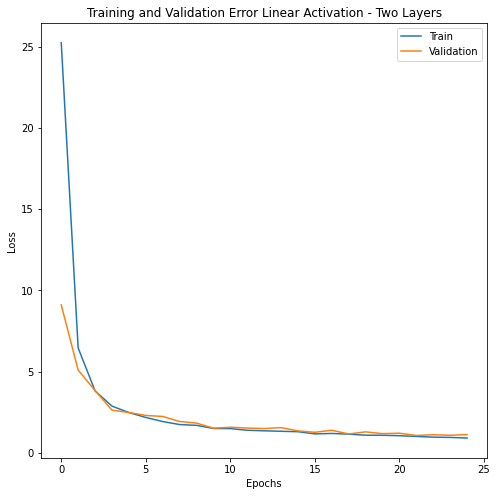

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))
plt.plot(Model_History.history['loss'])
plt.plot(Model_History.history['val_loss'])
plt.legend(['Train', 'Validation'], loc='upper right')
plt.xlabel("Epochs")
plt.ylabel("Loss")
x=plt.title("Training and Validation Error Linear Activation - Two Layers")

In [ ]:
Temp=Model.evaluate(X_test,Y_test,return_dict=True)
Batch_Size['Two Layer Non Linearity']=Temp['accuracy']

125/125 [==============================] - 0s 2ms/step - loss: 1.0523 - accuracy: 0.8832


In [ ]:
Cummalitive = pd.DataFrame(columns=['Description','Testing Accuracy'])

In [ ]:
Cummalitive

,Description,Testing Accuracy
0,One Layer Relu,0.96425
1,One Layer Sigmoid,0.96675
2,One Layer Non Linearity,0.88900
3,Two Layer Relu,0.94825
4,Two Layer Sigmoid,0.95950
5,Two Layer Non Linearity,0.88325


In [ ]:
for x,y in Batch_Size.items():
  dictionary={'Description':x,'Testing Accuracy':y}
  Cummalitive=Cummalitive.append(dictionary,ignore_index=True)

  #The Following Code Above Forms a Data Frame Detailing out the loss and accuracy with different Batch Sizes

  #Taking the Max Value

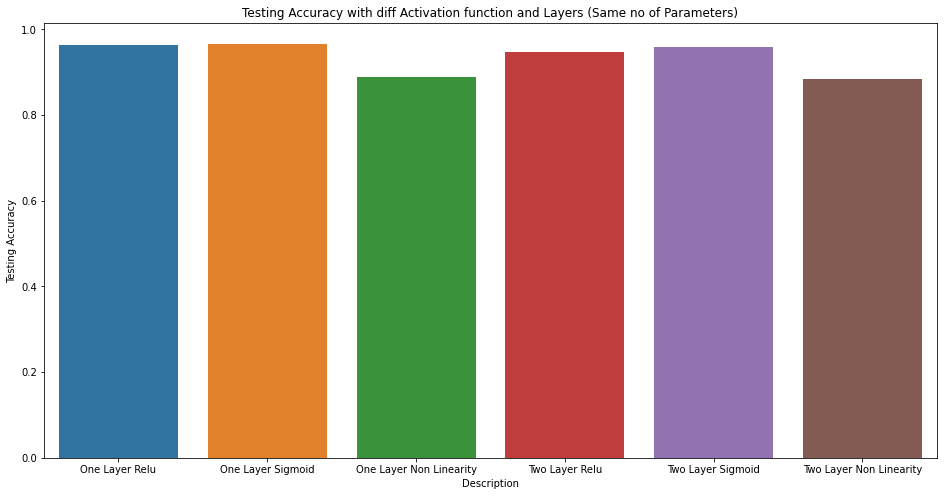

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x='Description',y='Testing Accuracy',data=Cummalitive)
x=plt.title('Testing Accuracy with diff Activation function and Layers (Same no of Parameters)')

-----------------------------------------------